In [1]:
%%javascript
// to avoid scroll in windows
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import matplotlib.pyplot as plt #used to avoid a warning message

In [3]:
import pandas as pd
import numpy as np
import csv
#from repast4py import parameters
#params = parameters.init_params("model1.yaml", "")

with open("plotInfo.csv","r") as data:
    reader = csv.reader(data, delimiter = ',')
    for row in reader:
        fileNameRoot=row[0]
        rankNum=int(row[1])
        ag0num=int(row[2])

In [4]:
colNames=["dimensional class", "initial inventories","total costs", "final inventories","profits", "added value",\
          "total production", "cost of production", "cost of unused factors",\
          "total lost production", "total cost of lost production", "cost of labor", "cost of capital"]
fileNameArray=np.chararray((ag0num, rankNum), itemsize=len(fileNameRoot)+30, unicode=True)

In [5]:
for k in range(rankNum):
    with open(fileNameRoot+"_balancesheetList_"+str(k)+".csv","r") as fileList:
        reader = csv.reader(fileList, delimiter = ',')
  
        for row in reader:
            for i in range(len(row)):
                fileNameArray[i,k]=row[i]

In [6]:
# database
data={}
for k in range(rankNum):
    for i in range(ag0num):
        p1=fileNameArray[i,k].find('(')
        p2=fileNameArray[i,k].find(')')+1
        data[fileNameArray[i,k][p1:p2]]=pd.read_csv(fileNameArray[i,k], header=None)

for aFirm in data.keys():
    data[aFirm].columns=colNames

In [7]:
# output by ranks
with plt.rc_context(rc={'figure.max_open_warning': 0}): #to avoid a worning about open plots
    
    data['allFirms']=data[list(data.keys())[0]].copy() # copy of first firm
    for aFirmUid in list(data.keys())[1:-1]:
        #if data[aFirmUid]['dimensional class'].loc[0] == 1.0: #to filter firms according to dim class
        data['allFirms']=data['allFirms'].add(data[aFirmUid])


In [8]:
data['allFirms'].drop(['dimensional class'], axis=1)

initial inventories  total costs  final inventories     profits   
0                 0.000   358.736699            104.835 -253.901699  \
1               104.835   358.736699            183.780 -279.791699   
2               183.780   358.736699            388.185 -154.331699   
3               388.185   358.736699            612.480 -134.441699   
4               612.480   358.736699            863.925 -107.291699   
..                  ...          ...                ...         ...   
95             3705.720   358.736699           3706.875 -357.581699   
96             3706.875   358.736699           3706.875 -358.736699   
97             3706.875   358.736699           3706.875 -358.736699   
98             3706.875   358.736699           3706.875 -358.736699   
99             3706.875   358.736699           3706.875 -358.736699   

     added value  total production  cost of production   
0   1.048350e+02         46.273350               97.05  \
1   7.894500e+01         55.326879              137.70   
2   2.044050e+02         90.589554              166.95   
3   2.242950e+02         97.757792              182.25   
4   2.514450e+02        106.612659              216.15   
..           ...               ...                 ...   
95  1.155000e+00          0.281661                1.05   
96  7.371881e-14          0.000000                0.00   
97  7.371881e-14          0.000000                0.00   
98  7.371881e-14          0.000000                0.00   
99  7.371881e-14          0.000000                0.00   

    cost of unused factors  total lost production   
0               261.686699               6.678746  \
1               221.036699              36.071986   
2               191.786699               0.000000   
3               176.486699               0.000000   
4               142.586699               8.149836   
..                     ...                    ...   
95              357.686699               0.000000   
96              358.736699               0.000000   
97              358.736699               0.000000   
98              358.736699               0.000000   
99              358.736699               0.000000   

    total cost of lost production  cost of labor  cost of capital  
0                           12.00          276.0        82.736699  
1                           69.15          251.0        75.982351  
2                            0.00          227.0        69.714147  
3                            0.00          209.0        64.038605  
4                           14.40          189.0        58.846504  
..                            ...            ...              ...  
95                           0.00           12.0         3.583108  
96                           0.00           12.0         3.571598  
97                           0.00           12.0         3.571598  
98                           0.00           12.0         3.571598  
99                           0.00           12.0         3.571598  

[100 rows x 12 columns]

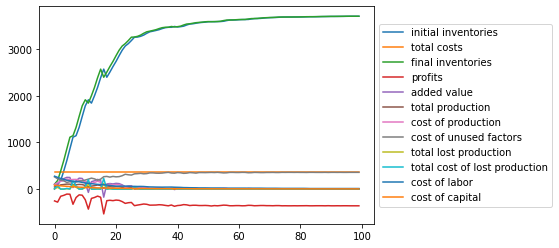

In [9]:
data['allFirms'].drop(['dimensional class'], axis=1).plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

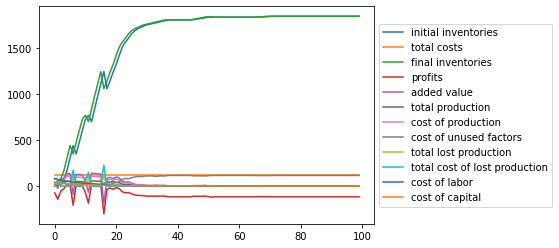

In [10]:
data['(0, 0, 0)'].drop(['dimensional class'], axis=1).plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

<AxesSubplot: >

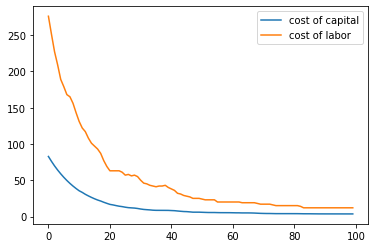

In [11]:
data['allFirms'][[ 'cost of capital','cost of labor']].plot()

<AxesSubplot: >

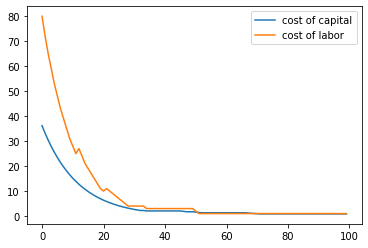

In [12]:
data['(0, 0, 0)'][['cost of capital', 'cost of labor']].plot()

# The National Economic Balance Table

In [13]:
data['allFirms'][['initial inventories', 'added value', 'final inventories']]

initial inventories   added value  final inventories
0                 0.000  1.048350e+02            104.835
1               104.835  7.894500e+01            183.780
2               183.780  2.044050e+02            388.185
3               388.185  2.242950e+02            612.480
4               612.480  2.514450e+02            863.925
..                  ...           ...                ...
95             3705.720  1.155000e+00           3706.875
96             3706.875  7.371881e-14           3706.875
97             3706.875  7.371881e-14           3706.875
98             3706.875  7.371881e-14           3706.875
99             3706.875  7.371881e-14           3706.875

[100 rows x 3 columns]